# Analyzing IMDB Data in Keras

In [105]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [106]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

In [107]:
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


In [108]:
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [109]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

In [110]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
#print(x_train[0])

[ 0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.
  1.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

And we'll also one-hot encode the output.

In [111]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


## 4. Building the  model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.

In [112]:
num_records, num_features = x_train.shape

In [139]:
# TODO: Build the model architecture
#my_model = Sequential()
#my_model.add(Dense(8, activation='relu', input_dim=num_features))
#my_model.add(Dropout(0.4))
#my_model.add(Dense(20, activation='relu'))
#my_model.add(Dropout(0.4))
#my_model.add(Dense(num_classes, activation='softmax'))

my_model = Sequential()
my_model.add(Dense(16, activation='relu', input_shape=(num_features,), kernel_regularizer=keras.regularizers.l2(0.1)))
my_model.add(Dropout(.4))
my_model.add(Dense(16, activation='relu', input_shape=(num_features,), kernel_regularizer=keras.regularizers.l2(0.1)))
my_model.add(Dropout(.4))
my_model.add(Dense(2, activation='softmax'))

In [140]:
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                16016     
_________________________________________________________________
dropout_23 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_24 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 2)                 34        
Total params: 16,322
Trainable params: 16,322
Non-trainable params: 0
_________________________________________________________________


In [142]:
# TODO: Compile the model using a loss function and an optimizer.
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
my_model.compile(loss = 'categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

## 5. Training the model
Run the model here. Experiment with different batch_size, and number of epochs!

In [143]:
epochs = 100
batch_size = 32

In [144]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000, 1000), (25000, 2), (25000, 1000), (25000, 2))

In [145]:
# TODO: Run the model. Feel free to experiment with different batch sizes and number of epochs.
my_model_history = my_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test), 
          verbose=0).history

In [146]:
my_model_history.keys()

dict_keys(['acc', 'val_acc', 'val_loss', 'loss'])

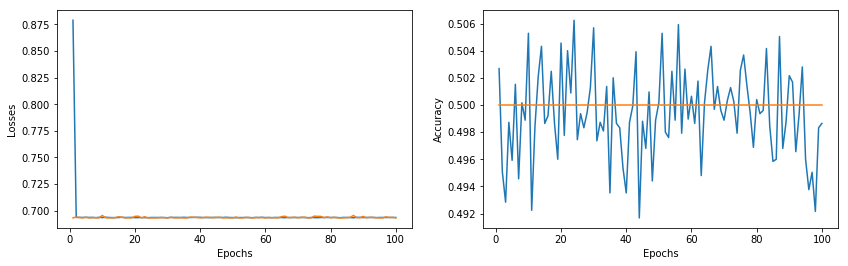

In [147]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
ax[0].plot(range(1, epochs + 1), my_model_history['loss'])
ax[0].plot(range(1, epochs + 1), my_model_history['val_loss'])
_ = ax[0].set(xlabel='Epochs', ylabel='Losses')
ax[1].plot(range(1, epochs + 1), my_model_history['acc'])
ax[1].plot(range(1, epochs + 1), my_model_history['val_acc'])
_ = ax[1].set(xlabel='Epochs', ylabel='Accuracy')

## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

In [121]:
score = my_model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: ", score[1])

Accuracy:  0.84484


## 7. Evaluating the Udacity model

In [122]:
epochs = 10
batch_size = 32

In [123]:
# Building the model architecture with one layer of length 100
udacity_model = Sequential()
udacity_model.add(Dense(512, activation='relu', input_dim=num_features))
udacity_model.add(Dropout(0.5))
udacity_model.add(Dense(num_classes, activation='softmax'))

In [124]:
udacity_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 1026      
Total params: 513,538
Trainable params: 513,538
Non-trainable params: 0
_________________________________________________________________


In [125]:
# Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
udacity_model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [126]:
# Running and evaluating the model
udacity_model_history = udacity_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test), 
          verbose=2).history

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
 - 9s - loss: 0.3961 - acc: 0.8304 - val_loss: 0.3397 - val_acc: 0.8572
Epoch 2/10
 - 7s - loss: 0.3354 - acc: 0.8650 - val_loss: 0.3510 - val_acc: 0.8614
Epoch 3/10
 - 6s - loss: 0.3242 - acc: 0.8776 - val_loss: 0.3578 - val_acc: 0.8592
Epoch 4/10
 - 7s - loss: 0.3130 - acc: 0.8861 - val_loss: 0.3746 - val_acc: 0.8604
Epoch 5/10
 - 7s - loss: 0.3043 - acc: 0.8904 - val_loss: 0.3846 - val_acc: 0.8603
Epoch 6/10
 - 7s - loss: 0.2977 - acc: 0.8967 - val_loss: 0.4055 - val_acc: 0.8559
Epoch 7/10
 - 8s - loss: 0.2851 - acc: 0.9036 - val_loss: 0.4341 - val_acc: 0.8596
Epoch 8/10
 - 8s - loss: 0.2781 - acc: 0.9088 - val_loss: 0.4420 - val_acc: 0.8565
Epoch 9/10
 - 7s - loss: 0.2734 - acc: 0.9139 - val_loss: 0.5290 - val_acc: 0.8442
Epoch 10/10
 - 7s - loss: 0.2537 - acc: 0.9203 - val_loss: 0.4825 - val_acc: 0.8560


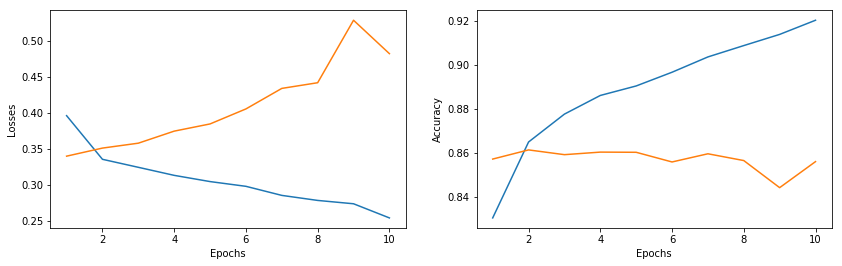

In [127]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
ax[0].plot(range(1, epochs + 1), udacity_model_history['loss'])
ax[0].plot(range(1, epochs + 1), udacity_model_history['val_loss'])
_ = ax[0].set(xlabel='Epochs', ylabel='Losses')
ax[1].plot(range(1, epochs + 1), udacity_model_history['acc'])
ax[1].plot(range(1, epochs + 1), udacity_model_history['val_acc'])
_ = ax[1].set(xlabel='Epochs', ylabel='Accuracy')